# Tests AB para tienda en linea

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

In [1]:
# Importar librerias
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# Cargar archivos
hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=';')
orders = pd.read_csv("/datasets/orders_us.csv")
visits = pd.read_csv("/datasets/visits_us.csv")


## Priorizar Hipotesis

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

 - Aplicar ICE y ordernar en orden descendente
 - Aplicar RICE y ordenar en orden descendente
 - Mostrar y explicar los cambios

In [3]:
# Mostrar df
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
# Mostrar info
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Mostrar estadisticos
hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


### Aplicar ICE

In [6]:
# Calcular ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence'] 
                    / hypotheses['Effort'])

# Mostrar ICE
ICE = hypotheses.sort_values(by='ICE', ascending=False)['ICE']
ICE

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
Name: ICE, dtype: float64

Observamos que las hipotesis mas importantes segun el framework ICE son la 8, la 0 y la 7 en ese orden con puntajes respectivos de 16, 13 y 11. Sus puntajes no varian mucho entre si.

### Aplicar RICE

In [7]:
# Calcular RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] 
                    / hypotheses['Effort'])

# Mostrar RICE
RICE = hypotheses.sort_values(by='RICE', ascending=False)['RICE']
RICE

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
Name: RICE, dtype: float64

Observamos que las hipotesis mas importantes segun el framework RICE son la 7, la 2, la 0 y la 6 en ese orden con puntajes respectivos de 112, 56, 40 y 40. Sus puntajes tienen una variacion mas considerable, siendo el puntaje del primer puesto el doble que el del segundo.

### RICE vs ICE

In [8]:
# Tomar el top 5 de RICE
rice_top5 = hypotheses[hypotheses.index.isin(RICE.index[0:5])]
rice_top5

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [9]:
# Tomar el top 5 de ICE
ice_top5 = hypotheses[hypotheses.index.isin(ICE.index[0:5])]
ice_top5

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


Vemos que las 5 mejores hipotesis son las mismas para ambas metricas, mas no en el mismo orden de prioridad. Cabe recalcar que la metrica RICE es una metrica ICE ponderada por la metrica de alcance Reach. Nos centramos en analizar estas diferencias:
 - La hipotesis 7 sube de 3er lugar en ICE a 1er lugar en RICE al tener el valor de Reach maximo de 10 
 - La hipotesis 2 sube de 5to lugar en ICE a 2do lugar en RICE al tener un alcance de 8
 - La hipotesis 6 sube de 4to lugar en ICE a 3er lugar en RICE al tener un alcance de 5
 - La hipotesis 0 baja de 2do lugar en ICE a 3er lugar en RICE por su bajo alcance de 3
 - La hipotesis 8 cae de 1er lugar en ICE a 5to lugar en RICE por tener el valor de Reach minimo de 1

### Conclusion

 - Las 5 mejores hipotesis segun el framework ICE son las mismas que segun el framework RICE
 - El top 3 segun ICE tiene una variacion baja en cuanto a puntajes
 - El top 3 segun RICE tiene una variacion mas alta en cuanto a puntajes
 - Dentro del top 5 segun ICE, las hipotesis con un Reach mayor o igual a 5 subieron en el orden de priorizacion en RICE
 - Dentro del top 5 segun ICE, las hipotesis con un Reach menor a 5 bajaron en el orden de priorizacion en RICE
 - Las hipotesis 7 y 0 se mantienen en ambos top 3. Se recomienda la 7 por su mayor alcance.

## Analisis del test A/B

 - Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
 - Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
 - Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
 - Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
 - Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
 - Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
 - Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
 - Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
 - Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
 - Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
 - Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
 - Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
 - Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

In [10]:
# Mostrar el dataset orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
# Mostramos la info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [12]:
# Cambiamos la columna date a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [13]:
# Verificamos duplicados en transactionId
print('Numero de Ids de ordenes duplicados: ', orders[['transactionId']].duplicated().sum())


Numero de Ids de ordenes duplicados:  0


In [14]:
# Verificamos que no haya interseccion entre los grupos
setA = set(orders[orders['group'] == 'A']['visitorId'])
setB = set(orders[orders['group'] == 'B']['visitorId'])
setAnB = setA.intersection(setB)
print('Numero de usuarios presentes en ambos grupos: ', len(setAnB))

Numero de usuarios presentes en ambos grupos:  58


In [15]:
# Eliminamos a los usuarios presentes en ambos grupos
orders_no_duplicates = orders[~orders['visitorId'].isin(list(setAnB))]
orders_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [16]:
# Mostrar el dataser visits
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
# Mostramos info
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
# Cambiamos la columna date al tipo datetime y la columna group al tipo category
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Se preprocesaron los datos correctamente:
 - Se cambiaron las columnas de fecha a tipo datetime
 - Se eliminaron a los usuarios que pertenecian a ambos grupos

### Ingresos acumulados por grupo

In [19]:
# Se genera la tabla de pares fecha y grupo
dateGroups = orders_no_duplicates[['date', 'group']].drop_duplicates()
dateGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [20]:
# Se genera la tabla de datos acumulados para orders
ordersAccum = dateGroups.apply(
lambda x: orders_no_duplicates[
    np.logical_and(
    orders_no_duplicates['date'] <= x['date'],
    orders_no_duplicates['group'] == x['group'])
].agg({
    'date': 'max',
    'revenue': 'sum',
    'group': 'max',
    'transactionId': 'nunique',
    'visitorId': 'nunique'
}), axis=1).sort_values(by=['date', 'group'])
ordersAccum.head()

,date,revenue,group,transactionId,visitorId
55,2019-08-01,2266.6,A,23,19
66,2019-08-01,967.2,B,17,17
175,2019-08-02,3734.9,A,42,36
173,2019-08-02,3535.3,B,40,39
291,2019-08-03,5550.1,A,66,60


In [21]:
# Se genera la tabla de datos acumulados para visits
visitsAccum = dateGroups.apply(
lambda x: visits[
    np.logical_and(
    visits['date'] <= x['date'],
    visits['group'] == x['group'])
].agg({
    'date': 'max',
    'group': 'max',
    'visits': 'sum'
}), axis=1).sort_values(by=['date', 'group'])
visitsAccum.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
# Se genera la tabla de datos acumulados
dataAccum = ordersAccum.merge(visitsAccum, on=['date', 'group'])
dataAccum.columns = ['date', 'revenue', 'group', 'transactions', 'buyers', 'visits']
dataAccum

,date,revenue,group,transactions,buyers,visits
0,2019-08-01,2266.6,A,23,19,719
1,2019-08-01,967.2,B,17,17,713
2,2019-08-02,3734.9,A,42,36,1338
3,2019-08-02,3535.3,B,40,39,1294
4,2019-08-03,5550.1,A,66,60,1845
...,...,...,...,...,...,...
57,2019-08-29,74576.7,B,510,490,17708
58,2019-08-30,52363.7,A,460,437,18037
59,2019-08-30,77863.5,B,531,511,18198
60,2019-08-31,53212.0,A,468,445,18736


In [23]:
# Se divide la tabla en grupos
dataAccumA = dataAccum[dataAccum['group'] == 'A']
dataAccumB = dataAccum[dataAccum['group'] == 'B']


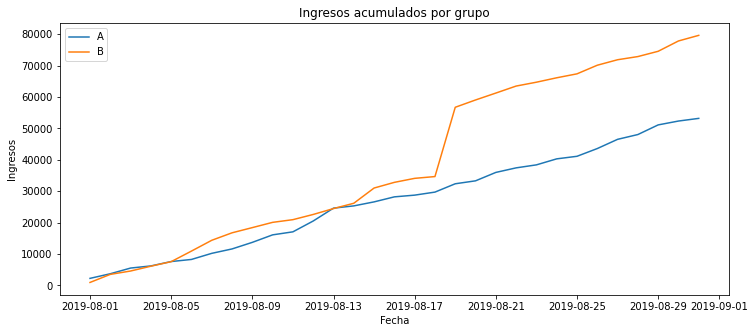

In [24]:
# Se grafica el ingreso acumulado por grupo
plt.figure(figsize=(12,5))
plt.plot(dataAccumA['date'], dataAccumA['revenue'], label='A')
plt.plot(dataAccumB['date'], dataAccumB['revenue'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.title('Ingresos acumulados por grupo')
plt.legend()
plt.show()

Podemos observar que al inicio del test los ingresos acumulados son relativamente parecidos y crecen de forma uniforme. El grupo B toma la delantera despues de la primera semana. Luego, aproximadamente el 18 de agosto, los ingresos acumulados del grupo B se elevan drasticamente de un dia para otro, mientras que los del grupo A siguen creciendo al mismo ratio. Finalmente, los ingresos acumulados del grupo B crecen a un ritmo parecido que el grupo A hasta finalizar el test.

Este crecimiento abrupto de un dia para otro debe ser estudiado y puede ser producto de multiples causas como un dia especial de ofertas, por ejemplo. Sin embargo, es curioso que dicho comportamiento se produzca solo en uno de los grupos.

### Tamanho de pedido promedio acumulado por grupo

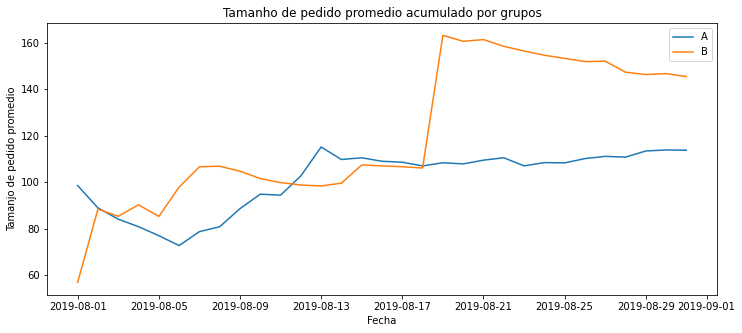

In [25]:
# Se grafica el tamanho de pedido promedio por grupo
plt.figure(figsize=(12,5))
plt.plot(dataAccumA['date'], dataAccumA['revenue'] / dataAccumA['transactions'], label='A')
plt.plot(dataAccumB['date'], dataAccumB['revenue'] / dataAccumB['transactions'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Tamanjo de pedido promedio')
plt.title('Tamanho de pedido promedio acumulado por grupos')
plt.legend()
plt.show()

Podemos observar que para el grupo A hubo una subida en la cantidad normal de pedidos al comiezo de la prueba, lo que provoca la caida observada en el tamnho de pedido promedio. Este empieza a recuperarse a partir del 6 de agosto hasta que se estabiliza una semana despues en un valor alrededor de 110.

El grupo B por el contrario, tiene un comportamiento escalonado. Parecio querer estabilizarse entre el 7 y 17 de agosto, mas el 18 presenta el salto abrupto visto en el grafico anterior. Esto indica que la subida en ingresos no se debe a un mayor numero de pedidos, sino a pedidos mas grandes. Finalmente, el tamanho de pedidos promedio comienza a decrecer al regularizarse los ingresos.

Es necesario examinar estos pedidos atipicos de gran magnitud, asi como el motivo de que solo esten presentes en el grupo B.

### Diferencia relativa en tamanho de pedido promedio acumulado 

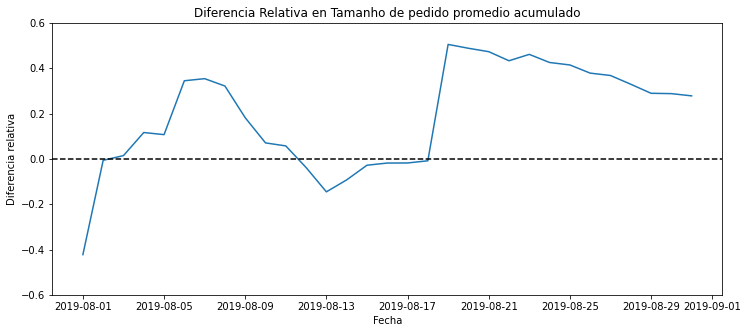

In [26]:
# Se grafica el tamanho de pedido promedio por grupo
plt.figure(figsize=(12,5))
plt.plot(dataAccumA['date'], ((dataAccumB['revenue']/dataAccumB['transactions']).reset_index(drop=True) /
                              (dataAccumA['revenue']/dataAccumA['transactions']).reset_index(drop=True) - 1))

plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.ylim([-0.6, 0.6])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia Relativa en Tamanho de pedido promedio acumulado')
plt.show()

Podemos ver que si bien el grupo B comienza la prueba con un tamanho de pedido promedio menor que el grupo A, se recupera rapidamente y supera con creces al grupo a hasta casi un 40%. Esto va de acorde con el incremento en el grafico de ingresos acumulados.

Luego, el 13, existe un caida  del 20% con respecto al grupo A debido a un incremento en el tamanho de pedidos promedio de este grupo. Cabe mencionar que a esta fecha los ingresos acumulados son los mismos para ambos grupos, asi que esto indica una cantidad menor de pedidos sin afectar los ingresos percibidos (pedidos mas costosos).

Finalmente, se observan las implicancias de los ingresos anormales el dia 18, lo que eleva al grupo B por encima del 50% con respecto al grupo A, incremento que decrece hasta u 30% por encima del grupo A al finalizar la prueba. Hemos mencionado anteriormente que esto se debe a un numero de pedidos anomalos altamente costosos que seran estudiados mas adelante.

### Tasas de conversion diarias

In [27]:
# Se genera tabla de datos diarios
dataDaily = (
    orders_no_duplicates.merge(visits, on=['date', 'group'])
    .groupby(by=['date', 'group'], as_index=False)
    .agg({
        'transactionId': 'nunique',
        'visitorId': 'nunique',
        'revenue': 'sum',
        'visits': 'max'
    })
)
dataDaily.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visits']
dataDaily.head()

,date,group,transactions,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,19,18,1468.3,619
3,2019-08-02,B,23,22,2568.1,581
4,2019-08-03,A,24,24,1815.2,507


In [28]:
# Se calcula la conversion
dataDaily['conversion'] = (dataDaily['transactions'] / 
                          dataDaily['visits']) * 100
dataDaily.head()

,date,group,transactions,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,3.198887
1,2019-08-01,B,17,17,967.2,713,2.384292
2,2019-08-02,A,19,18,1468.3,619,3.069467
3,2019-08-02,B,23,22,2568.1,581,3.958692
4,2019-08-03,A,24,24,1815.2,507,4.733728


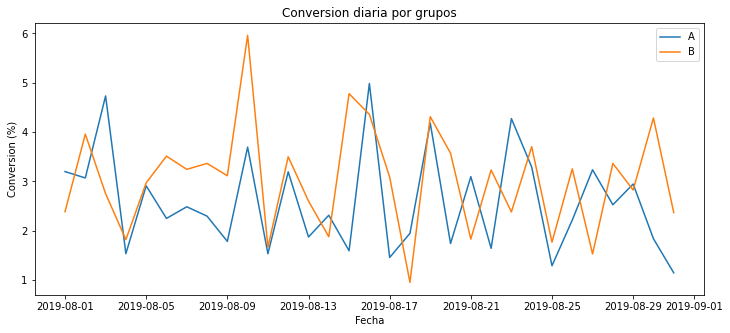

In [29]:
# Se grafica la conversion diaria por grupos
dataDailyA = dataDaily[dataDaily['group'] == 'A']
dataDailyB = dataDaily[dataDaily['group'] == 'B']

plt.figure(figsize=(12, 5))
plt.plot(dataDailyA['date'], dataDailyA['conversion'], label='A')
plt.plot(dataDailyB['date'], dataDailyB['conversion'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Conversion (%)')
plt.legend()
plt.title('Conversion diaria por grupos')
plt.show()

Podemos observar que la conviersion diaria oscila bastante para ambos grupos. Es preferible observar la conversion acumulada y sacar conclusiones de esa grafica.

/tmp/ipykernel_76/1044173844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAccumA['conversion'] = (dataAccumA['transactions'] /
/tmp/ipykernel_76/1044173844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAccumB['conversion'] = (dataAccumB['transactions'] /


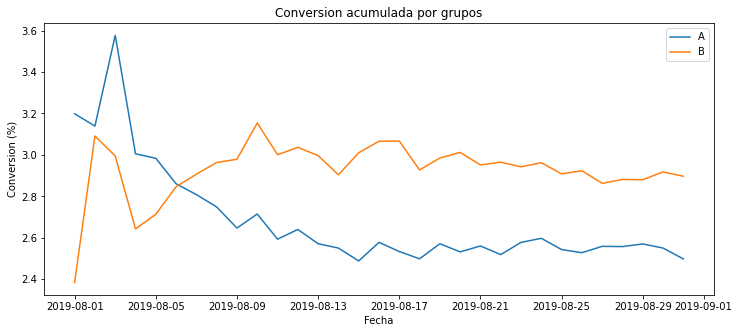

In [30]:
# Se grafica la conversion acumulada para ambos grupos
dataAccumA['conversion'] = (dataAccumA['transactions'] /
                           dataAccumA['visits']) * 100
dataAccumB['conversion'] = (dataAccumB['transactions'] /
                           dataAccumB['visits']) * 100

plt.figure(figsize=(12, 5))
plt.plot(dataAccumA['date'], dataAccumA['conversion'], label='A')
plt.plot(dataAccumB['date'], dataAccumB['conversion'], label='B')

plt.xlabel('Fecha')
plt.ylabel('Conversion (%)')
plt.legend()
plt.title('Conversion acumulada por grupos')
plt.show()

Observamos que la conversion del grupo A es superior a la del grupo B al comienzo del test. Sin embargo, esta comienza a decrecer constantemente y se estabiliza en un valor alrededor del 2.5%.

Por el contrario, la conversion del grupo B empieza siendo inferior a la del grupo A, mas empieza a subir constantemente y supera a la del grupo A dentro de la primera semana. Al finalizar el test se estabiliza en alrededor de 2.9%, superior a la del grupo A y con una diferencia relativa del 16%.

Esta grafica nos indica que la conversion del grupo B es mejor que la del grupo A. Falta corroborar si esta diferencia es estadisticamente significativa.


### Numero de pedidos por usuario

In [31]:
# Se calculan los pedidos de cada usuario
ordersByUsers = (orders_no_duplicates
                 .groupby('visitorId', as_index=False)
                 .agg({
                     'transactionId': 'nunique'
                 }))
ordersByUsers.columns = ['visitorId', 'transactions']
ordersByUsers

,visitorId,transactions
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


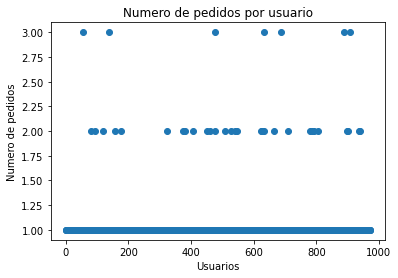

In [32]:
# Se traza el grafico de dispersion
x_values = pd.Series(range(len(ordersByUsers['transactions'])))

plt.scatter(x_values, ordersByUsers['transactions'])

plt.xlabel('Usuarios')
plt.ylabel('Numero de pedidos')
plt.title('Numero de pedidos por usuario')
plt.show()

Observamos que la gran mayoria de usuarios realiza un solo pedido. Otra parte, realiza dos pedidos. Solo unos cuantos pocos (7 usuarios) realizan 3 pedidos.

Estos usuarios anomalos que realizan 3 pedidos pueden ser excluidos del analisis.

### Percentiles de numero de pedidos por usuario

In [33]:
# Calculamos los percentiles para el numero de pedidos por usuario
np.percentile(ordersByUsers['transactions'], [90, 95, 99])

array([1., 1., 2.])

El calculo de percentiles corrobora lo observado en el grafico: solo el 1% de los usuarios hace mas de dos pedidos. Estos usuarios son anomalos y seran descartados del analisis.

### Precio de los pedidos

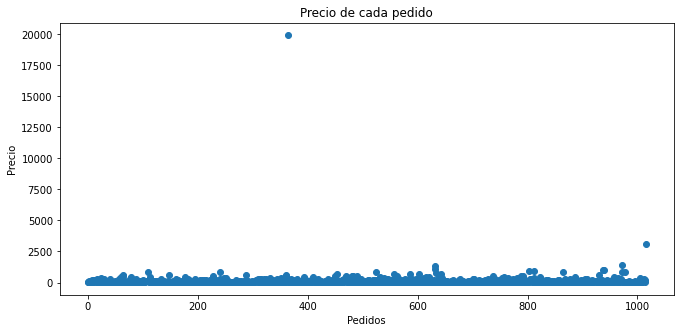

In [34]:
# Se traza el grafico de dispersion de los precios de los pedidos
x_values = pd.Series(range(len(orders_no_duplicates['revenue'])))

plt.figure(figsize=(11, 5))
plt.scatter(x_values, orders_no_duplicates['revenue'])

plt.xlabel('Pedidos')
plt.ylabel('Precio')
plt.title('Precio de cada pedido')
plt.show()

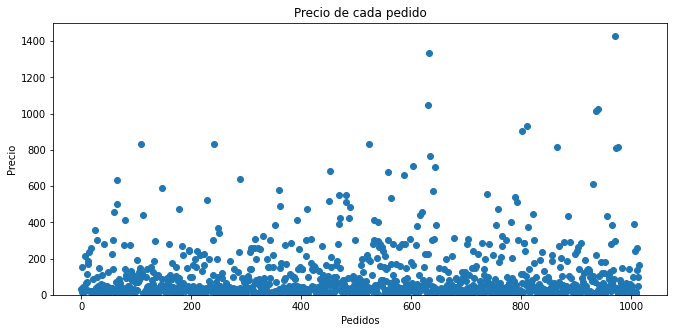

In [35]:
# Hacemos zoom
plt.figure(figsize=(11, 5))
plt.scatter(x_values, orders_no_duplicates['revenue'])

plt.xlabel('Pedidos')
plt.ylabel('Precio')
plt.ylim([0, 1500])
plt.title('Precio de cada pedido')
plt.show()

Del primer grafico podemos observar un dato anomalo muy potente: un unico pedido de 20000. Este unico pedido puede ser el causante del incremento abrupto en la grafica de ingreso acumulado y la de tamanho de pedido promedio para el grupo B. Contamos con otro dato anomalo no tan potente con un precio alrededor de 3000, este tambien puede provocar cambios indeseados, mas no es tan relevante como el primero.

Del segundo grafico observmamos que los precios de los pedidos se encuentran bien dispersos. Si bien la mayoria de los pedidos son menores de 200, no es claro desde el grafico donde trazar la linea de pedidos con precios exhorbitantes o anomalos. Es necesario el analisis de percentiles.


### Percetiles de los precios de los pedidos

In [36]:
# Calculamos los percentiles
np.percentile(orders_no_duplicates['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

Observamos que solo el 10% de los pedidos es superior a 280, lo cual concuerda con lo observado en la grafica (la mayoria de los pedidos e inferior a 200). Solo el 5% de los pedidos es superior a 414 y solo el 1% de los pedidos es superior a 830. De aqui podemos escoger si excluir al 5% o al 1% superior.

Del grafico con zoom, consideramos que los pedidos superiores a 400 se encuentran bastante dispersos y los menores se encuentran mas apinhados y serian mas representativos de los datos en general. Optamos por rechazar el 5% superior de los pedidos para el analisis.

### Diferencias en Conversion - Datos en Bruto

In [37]:
# Se calculan los pedidos de cada usuario del grupo A
ordersByUsersA = (orders_no_duplicates[orders_no_duplicates['group'] == 'A']
                 .groupby('visitorId', as_index=False)
                 .agg({
                     'transactionId': 'nunique'
                 }))
ordersByUsersA.columns = ['visitorId', 'transactions']
ordersByUsersA.head()

,visitorId,transactions
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [38]:
# Se calculan los pedidos de cada usuario del grupo B
ordersByUsersB = (orders_no_duplicates[orders_no_duplicates['group'] == 'B']
                 .groupby('visitorId', as_index=False)
                 .agg({
                     'transactionId': 'nunique'
                 }))
ordersByUsersB.columns = ['visitorId', 'transactions']
ordersByUsersB.head()

,visitorId,transactions
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [39]:
# Se prepara la muestra del grupo A
zerosA = pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() -
    len(ordersByUsersA['transactions'])))

sampleA = pd.concat([
    ordersByUsersA['transactions'], zerosA
])
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Length: 18736, dtype: int64

In [40]:
# Se prepara la muestra del grupo B
zerosB = pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() -
    len(ordersByUsersB['transactions'])))

sampleB = pd.concat([
    ordersByUsersB['transactions'], zerosB
])
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Length: 18916, dtype: int64

In [41]:
# Se realiza el Mann Whitney U Test
resultsConversion = st.mannwhitneyu(sampleA, sampleB)

print('p-value: {0:.3f}'.format(resultsConversion[1]))
print('Conversion (A): {0:.3f}'
      .format(sampleA.mean()))
print('Conversion (B): {0:.3f}'
      .format(sampleB.mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          sampleB.mean() / 
          sampleA.mean() - 1))

p-value: 0.011
Conversion (A): 0.025
Conversion (B): 0.029
Diferencia relativa: 0.160


Con los datos sin filtrar, la significancia estadistica de la prueba es del 1.1%. Esto indica que tenemos razones suficientes para considerar que la diferencia relativa de 16% en la conversion entre los grupos es significativa y no producto de una anomalia estadistica, pero solo si el valor de alpha es mayor a 1%. Si fijamos el alpha en 1% deberiamos rechazar la idea de que existe variacion significante entre las conversiones de ambos grupos.

Trabajar con los datos filtrados nos dara un mejor enfoque en estos resultados.

### Diferencias en tamanho promedio de pedido - Datos en Bruto

In [42]:
# Se realiza el Mann Whitney U Test para los tamanhos de pedidos promedio
ordersA = orders_no_duplicates[orders_no_duplicates['group'] == 'A']
ordersB = orders_no_duplicates[orders_no_duplicates['group'] == 'B']

resultsAvgOrders = st.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])

print("p-value {0:.3f}"
      .format(resultsAvgOrders[1]))
print('Tamanho promedio de pedido (A): {0:.3f}'
      .format(ordersA['revenue'].mean()))
print('Tamanho promedio de pedido (B): {0:.3f}'
      .format(ordersB['revenue'].mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          ordersB['revenue'].mean() / 
          ordersA['revenue'].mean() - 1))

p-value 0.862
Tamanho promedio de pedido (A): 113.701
Tamanho promedio de pedido (B): 145.349
Diferencia relativa: 0.278


Vemos que el p-value es muy alto, lo que indicaria que las diferencias observadas en las graficas anteriores no es estadisticamente significativa y que los tamanhos promedio de pedidos para ambos grupos son los mismos.

Recordemos que estos resultados son obtenidos incluyendo los datos anomalos, al filtrarlos deberian existir aun menos diferencias.

### Diferencias en Conversion - Datos Filtrados

In [43]:
# Filtramos a los usuarios con compras costosas
usersExpensiveOrders = orders_no_duplicates[orders_no_duplicates['revenue'] > 414.275]['visitorId']
usersExpensiveOrders.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

In [44]:
# Filtramos a los usuarios con muchas compras
usersManyOrders = ordersByUsers[ordersByUsers['transactions'] >= 2]['visitorId']
usersManyOrders.head()

55     249864742
82     366673373
94     406208401
118    522292794
138    611059232
Name: visitorId, dtype: int64

In [45]:
# Concatenamos las series
abnormalUsers = pd.concat([usersExpensiveOrders, usersManyOrders], axis=0).drop_duplicates()
abnormalUsers.head()

73     2947100995
77      787824685
78     3288820196
131    2254586615
137    1211585711
Name: visitorId, dtype: int64

In [46]:
# Se filtran los usuarios anomalos y se prepara la muestra del grupo A
sampleAFiltered = pd.concat([
    ordersByUsersA[~ordersByUsersA['visitorId'].isin(abnormalUsers)]['transactions'],
    zerosA
])
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Length: 18697, dtype: int64

In [47]:
# Se filtran los usuarios anomalos y se prepara la muestra del grupo B
sampleBFiltered = pd.concat([
    ordersByUsersB[~ordersByUsersB['visitorId'].isin(abnormalUsers)]['transactions'],
    zerosB
])
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Length: 18869, dtype: int64

In [48]:
# Se realiza el Mann Whitney U Test
resultsConversionFiltered = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value: {0:.3f}'.format(resultsConversionFiltered[1]))
print('Conversion (A): {0:.4f}'
      .format(sampleAFiltered.mean()))
print('Conversion (B): {0:.4f}'
      .format(sampleBFiltered.mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          sampleBFiltered.mean() / 
          sampleAFiltered.mean() - 1))

p-value: 0.016
Conversion (A): 0.0217
Conversion (B): 0.0255
Diferencia relativa: 0.174


El p-value ha aumentado con respecto a los datos sin filtrar. Aun asi, este valor de 1.6% sigue siendo menor que un valor alpha estandar de 5%. Adicionalmente, la diferencia relativa entre los grupos ha aumentado de 16% a 17%. Esto nos lleva a corroborar que la diferencia observada entre las conversiones de ambos grupos es estadisticamente significativa.

Cabe recalcar que si se estuviese realizando multiples pruebas al mismo tiempo, el umbral especifico de esta etapa seria necesariamente mas bajo lo cual podria llevar a que este p-value de 1.6% sea demasiado alto, en cuyo caso se atribuiria la diferencia observada a una anomalia estadistica.

### Diferencias en tamanho promedio de pedido - Datos Filtrados

In [49]:
# Se filtran los datos y se realiza el Mann Whitney U Test para los tamanhos de pedidos promedio
ordersAFiltered = ordersA[~ordersA['visitorId'].isin(abnormalUsers)]
ordersBFiltered = ordersB[~ordersB['visitorId'].isin(abnormalUsers)]

resultsAvgOrdersFiltered = st.mannwhitneyu(ordersAFiltered['revenue'], ordersBFiltered['revenue'])

print("p-value: {0:.3f}"
      .format(resultsAvgOrdersFiltered[1]))
print('Tamanho promedio de pedido (A): {0:.3f}'
      .format(ordersAFiltered['revenue'].mean()))
print('Tamanho promedio de pedido (B): {0:.3f}'
      .format(ordersBFiltered['revenue'].mean()))
print("Diferencia relativa: {0:.3f}"
      .format(
          ordersBFiltered['revenue'].mean() / 
          ordersAFiltered['revenue'].mean() - 1))

p-value: 0.771
Tamanho promedio de pedido (A): 80.747
Tamanho promedio de pedido (B): 78.058
Diferencia relativa: -0.033


Observamos que el p-value se reduce, lo cual puede parecer contraintuitivo al comienzo. Las medias de ambos grupos son mas cercanas ahora, lo cual nos lleva a pensar que el p-value deberia ser mayor. Sin embargo, al eliminar a los usuarios con pedidos altamente costosos, la varianza se reduce en gran magnitud. Esta reduccion en la dispersion de los datos conlleva a que el p-value sea menor que en el caso sin filtrar.

Dicho todo esto, el p-value sigue siendo muy superior a 5%, con lo que concluimos que no existe una variacion significativa en los tamanhos promedio de pedidos entre ambos grupo.

### Toma de Decisiones

Luego de analizar detenidamente los datos, se considera que la decision debe depender en primer lugar de lo que se desea obtener de ella. Planteamos dos escenarios.

1. Aumentar la conversion
 - Como herramienta para aumentar la conversion, consideramos la prueba exitosa. El grupo B tiene una conversion primedio significativamente mas alta que el grupo A.
 
2. Aumentar los ingresos
 - No consideramos que se hayan aumentado los ingresos con respecto al grupo control. Los usuarios atipicos sesgan los datos y el grupo B aparenta traer mayores ingresos a la empresa, mas no es el caso. Luego de filtrar los datos, no parece que este escenario vaya cambiar. Considereamos que no hay diferencia entre los grupos.

En ambos escenarios se recomienda detener la prueba. Somos conscientes de que el objetivo principal inicial fue aumentar los ingresos, objetivo que no fue cumplido. No obstante, recomendamos plantear el aumento de la conversion como un objetivo secundario, el cual si se cumplio.

Que no hayamos logrado el objetivo inicial planteado no implica necesariamente que la prueba no haya dado frutos... Solo no dio los esperados, mas todo progreso es progreso.